In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from datetime import datetime
pd.set_option('display.max_columns', None)
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
warnings.filterwarnings("ignore")

## Loading the training data

In [2]:
train=pd.read_csv('D:\\Data_sets\\movie\\train.csv')
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [3]:
train.shape

(3000, 23)

### Additional features:- adding the some additional features which will improve our model accuracy

popularity2, rating, totalVotes

link for additional features:-  

https://www.kaggle.com/kerneler/starter-tmdb-competition-additional-0a390987-e/data?select=TrainAdditionalFeatures.csv
https://www.kaggle.com/kerneler/starter-tmdb-competition-additional-0a390987-e/data?select=TestAdditionalFeatures.csv

In [4]:
train_additionalfeature=pd.read_csv('D:\\Data_sets\\movie\\TrainAdditionalFeatures.csv')

In [5]:
### Merging the additional features to the train data on the basis of imdb_id

In [6]:
train=pd.merge(train,train_additionalfeature, how='left', on=['imdb_id'])

In [7]:
train.shape

(3000, 26)

## Loading the test data

In [8]:
test=pd.read_csv('D:\\Data_sets\\movie\\test.csv')
test.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."


In [9]:
test.shape

(4398, 22)

In [10]:
test_additionalfeature=pd.read_csv('D:\\Data_sets\\movie\\TestAdditionalFeatures.csv')

In [11]:
### Merging the additional features to the test data on the basis of imdb_id

In [12]:
test=pd.merge(test,test_additionalfeature, how='left', on=['imdb_id'])

In [13]:
test.shape

(4398, 25)

## Correcting/revising some wrong data in train and test data sets 

link for this :-

https://www.kaggle.com/kamalchhirang/eda-feature-engineering-lgb-xgb-cat#Feature-Engineering-&-Prediction

In [14]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

test.loc[test['release_date'].isnull() == True, 'release_date'] = '01/01/98'

In [15]:
## Null- values (train)

In [16]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
popularity2               118
rating                    118
totalVotes                118
dtype: int64

In [17]:
## Null- values (test)

In [18]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                0
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
popularity2               179
rating                    179
totalVotes                179
dtype: int64

In [19]:
## EDA and Feature Engineering

In [20]:
### 1. id

In [21]:
# dropping the id column as it has no correlation with target column

In [22]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [23]:
### 2. belongs_to_collection

In [24]:
## checking for the effect on the revenue which has collectin data and which hasn't collection data

In [25]:
def get_dict(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [26]:
def has_collection(df):
    
    has_collection=[]

    for i in df.belongs_to_collection:
        d=get_dict(i)
        if d != {}:
            has_collection.append(1)
        else:
            has_collection.append(0)
    
    df['has_collection']=has_collection

In [27]:
has_collection(train)

In [28]:
has_collection(test)

<AxesSubplot:xlabel='has_collection', ylabel='revenue'>

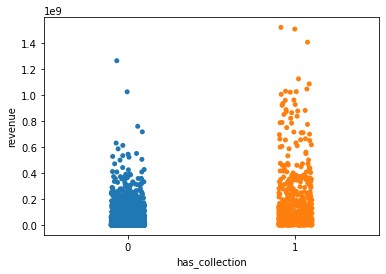

In [29]:
sns.stripplot(x=train.has_collection,y=train.revenue)

In [30]:
## from the above figure we can say that there is some effect on the revenue w.r.t has collection and hasn't collection

In [31]:
train.drop(['belongs_to_collection'], axis=1, inplace=True)
test.drop(['belongs_to_collection'], axis=1, inplace=True)

## 3. budget

In [32]:
# checking for the null values 

In [33]:
train.budget.isnull().sum()

0

In [34]:
test.budget.isnull().sum()

0

In [35]:
## checking the distribution of budget

<AxesSubplot:xlabel='budget', ylabel='Count'>

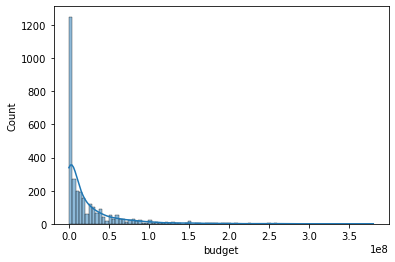

In [36]:
sns.histplot(train.budget, kde=True)

In [37]:
## we can see that the data is +ve skew, so we have to use log transformation to make it normally dist.

<AxesSubplot:xlabel='budget', ylabel='Count'>

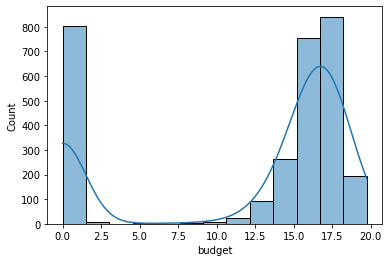

In [38]:
sns.histplot(np.log1p(train.budget), kde=True)

<AxesSubplot:xlabel='budget', ylabel='revenue'>

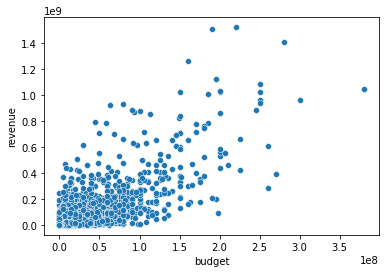

In [39]:
sns.scatterplot(x=train.budget,y=train.revenue)

In [40]:
## from above fig. we can see that with incease in budget, revenue also increases i.e. linear relationship

## 4. genres

In [41]:
## number of genres

In [42]:
def number_of_genre(df):
    
    no_of_genre=[]

    for i in df.genres:
        d=get_dict(i)
        no_of_genre.append(len(d))
        
    df['no_of_genre']=no_of_genre

In [43]:
number_of_genre(train)

In [44]:
number_of_genre(test)

<AxesSubplot:xlabel='no_of_genre', ylabel='count'>

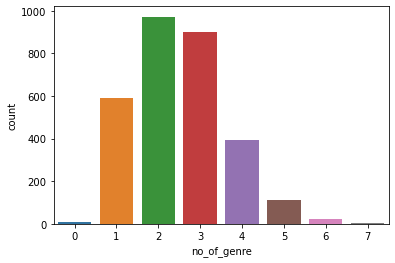

In [45]:
sns.countplot(x=train.no_of_genre)

<AxesSubplot:xlabel='no_of_genre', ylabel='revenue'>

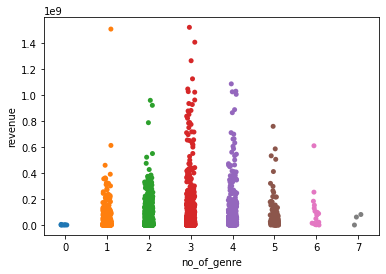

In [46]:
sns.stripplot(x=train.no_of_genre,y=train.revenue)

In [47]:
# from above fig. we can see that there is an effect on number of gerne on the revenue, so we can use this feature for model
# building

In [48]:
# top genre

In [49]:
total_count_genre=[]

for i in train.genres:
    d=get_dict(i)
    for j in d:
        total_count_genre.append(j['name'])

In [50]:
Counter(total_count_genre).most_common()

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [51]:
top_genre=[]

def top_genres(df):
    
    total_count_genre=[]

    for i in df.genres:
        d=get_dict(i)
        for j in d:
            total_count_genre.append(j['name'])
            
    for i in Counter(total_count_genre).most_common():
        if i[1]>10:                            ## taking the genre which has frequency count > 10
            top_genre.append(i[0])
            
    

In [52]:
top_genres(train)

In [53]:
def top_genre_one_hot_encoding(df):
    
    df['all_genres'] = df['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')
    
    for g in top_genre:
        df['genre_' + g] = df['all_genres'].apply(lambda x: 1 if g in x else 0) 

In [54]:
top_genre_one_hot_encoding(train)

In [55]:
top_genre_one_hot_encoding(test)

In [56]:
train.head(1)

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.4,5.0,482.0,1,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
train.drop(['genres','all_genres'], axis=1, inplace=True)
test.drop(['genres','all_genres'], axis=1, inplace=True)

In [58]:
train.shape

(3000, 44)

In [59]:
test.shape

(4398, 43)

## 5. homepage

In [60]:
## check for homepage eixsts or not and its effect on revenue

In [61]:
def has_homepage(df):
    
    homepage_exit=[]
    
    for i in df.homepage:
        if str(i)=='nan':
            homepage_exit.append(0)
        else:
            homepage_exit.append(1)
            
    df['homepage_exit']=homepage_exit

In [62]:
has_homepage(train)

In [63]:
has_homepage(test)

<AxesSubplot:xlabel='homepage_exit', ylabel='revenue'>

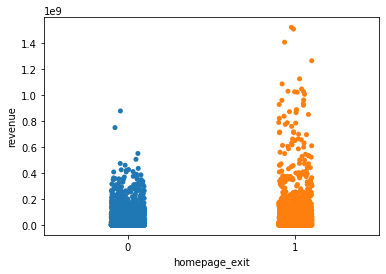

In [64]:
sns.stripplot(train.homepage_exit, train.revenue)

In [65]:
# from the above fig. we can see that the homepage exists has effect on the revenue

In [66]:
train.drop('homepage', axis=1, inplace=True)
test.drop('homepage', axis=1, inplace=True)

## 6. imdb_id

In [67]:
train.imdb_id

0       tt2637294
1       tt0368933
2       tt2582802
3       tt1821480
4       tt1380152
          ...    
2995    tt0109403
2996    tt2364975
2997    tt0116908
2998    tt0343135
2999    tt1600195
Name: imdb_id, Length: 3000, dtype: object

In [68]:
## dropping this feature as it has no effect on revenue

In [69]:
train.drop('imdb_id', axis=1, inplace=True)
test.drop('imdb_id', axis=1, inplace=True)

## 7. original_language

In [70]:
## checking the original language is english or not

In [71]:
def original_lang_english(df):
    
    orignal_lang_english=[]

    for i in df.original_language:
        if str(i)=='en':
            orignal_lang_english.append(1)
        else:
            orignal_lang_english.append(0)
            
    df['orignal_lang_english']=orignal_lang_english

In [72]:
original_lang_english(train)

In [73]:
original_lang_english(test)

<AxesSubplot:xlabel='orignal_lang_english', ylabel='revenue'>

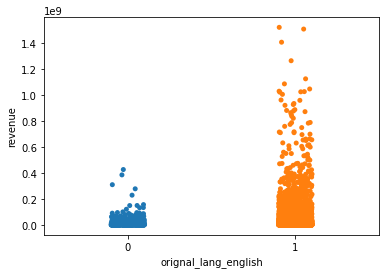

In [74]:
sns.stripplot(x=train.orignal_lang_english,y=train.revenue)

In [75]:
## from the above we can see that the there are more count of english language, and also has effect on the revenue as well 
## i.e. high revenue

In [76]:
train.drop('original_language', axis=1, inplace=True)
test.drop('original_language', axis=1, inplace=True)

## 8. original_title

In [77]:
train.original_title

0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                        Kahaani
4                                           마린보이
                          ...                   
2995                                     Chasers
2996                                 Vi är bäst!
2997                     The Long Kiss Goodnight
2998                            Along Came Polly
2999                                   Abduction
Name: original_title, Length: 3000, dtype: object

In [78]:
## since original_title is a combination of string, so in this case we can see the effect of length of original_title on the 
## revenue i.e. by counting the letter or words in the original_title of the movie.

In [79]:
## letter count

In [80]:
train['original_title_letter_count'] = train.original_title.str.len()
test['original_title_letter_count'] = test.original_title.str.len()

<AxesSubplot:xlabel='original_title_letter_count', ylabel='revenue'>

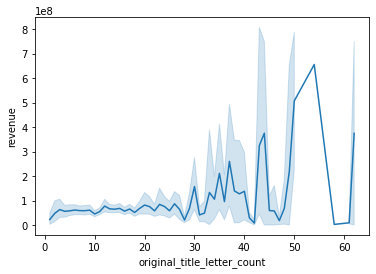

In [81]:
sns.lineplot(x=train.original_title_letter_count,y=train.revenue)

In [82]:
## from the above fig. we can see that there is an effect of letter count on the revenue

In [83]:
## word count

In [84]:
train['original_title_word_count'] = train.original_title.str.split().str.len()
test['original_title_word_count'] = test.original_title.str.split().str.len()

<AxesSubplot:xlabel='original_title_word_count', ylabel='revenue'>

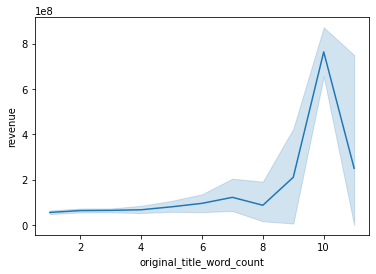

In [85]:
sns.lineplot(x=train.original_title_word_count,y=train.revenue)

In [86]:
## ## from the above fig. we can see that there is an effect of word count on the revenue

In [87]:
train.drop('original_title', axis=1, inplace=True)
test.drop('original_title', axis=1, inplace=True)

## 9. overview

In [88]:
train.overview

0       When Lou, who has become the "father of the In...
1       Mia Thermopolis is now a college graduate and ...
2       Under the direction of a ruthless instructor, ...
3       Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4       Marine Boy is the story of a former national s...
                              ...                        
2995    Military men Rock Reilly and Eddie Devane are ...
2996    Three girls in 1980s Stockholm decide to form ...
2997    Samantha Caine, suburban homemaker, is the ide...
2998    Reuben Feffer is a guy who's spent his entire ...
2999    A young man sets out to uncover the truth abou...
Name: overview, Length: 3000, dtype: object

In [89]:
## checking the effect of word count in overview

In [90]:
train['overview_word_count'] = train.overview.str.split().str.len()
test['overview_word_count'] = test.overview.str.split().str.len()

<AxesSubplot:xlabel='overview_word_count', ylabel='revenue'>

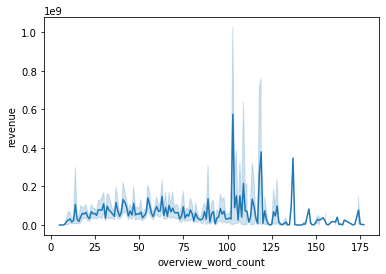

In [91]:
sns.lineplot(x=train.overview_word_count,y=train.revenue)

In [92]:
## from the above fig. we can see that the word count b/w 100-140 has high revenue

In [93]:
train.drop('overview', axis=1, inplace=True)
test.drop('overview', axis=1, inplace=True)

In [94]:
## 10. popularity

In [95]:
train.popularity

0        6.575393
1        8.248895
2       64.299990
3        3.174936
4        1.148070
          ...    
2995     9.853270
2996     3.727996
2997    14.482345
2998    15.725542
2999    10.512109
Name: popularity, Length: 3000, dtype: float64

In [96]:
## cheking the distribution of data

<AxesSubplot:xlabel='popularity', ylabel='Count'>

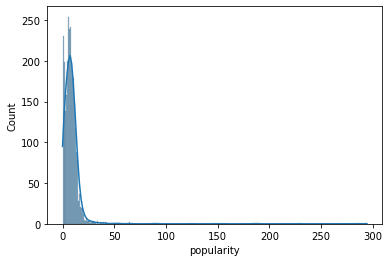

In [97]:
sns.histplot(train.popularity, kde=True)

In [98]:
## we can see that the data is +ve skew, so we have to use log transformation to make it normally dist.

<AxesSubplot:xlabel='popularity', ylabel='Count'>

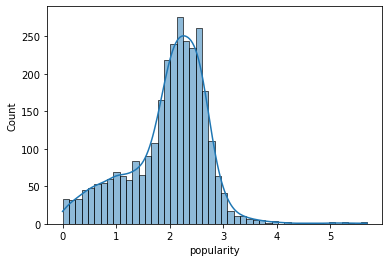

In [99]:
sns.histplot(np.log1p(train.popularity), kde=True)

## 11. poster_path

In [100]:
train.poster_path

0       /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
1       /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg
2       /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg
3       /aTXRaPrWSinhcmCrcfJK17urp3F.jpg
4       /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg
                      ...               
2995    /j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg
2996    /sS01LSy6KDrCZAhtkO18UdnWFT1.jpg
2997    /4MENR8x6mYqnZvp2hGjSaPJz64J.jpg
2998    /nIY4kvJTTnxoBR0wycrXng5MOYs.jpg
2999    /cUT6NQP5LAJpmUoStGtXmvNt4zA.jpg
Name: poster_path, Length: 3000, dtype: object

In [101]:
## dropping the poster_path

In [102]:
train.drop('poster_path', axis=1, inplace=True)
test.drop('poster_path', axis=1, inplace=True)

## 12. production_companies

In [103]:
## number of production_companies & its effect on revenue

In [104]:
def number_of_production_comp(df):
    
    no_of_prod_comp=[]

    for i in df.production_companies:
        d=get_dict(i)

        no_of_prod_comp.append(len(d))
        
    df['no_of_prod_comp']=no_of_prod_comp

In [105]:
number_of_production_comp(train)

In [106]:
number_of_production_comp(test)

<AxesSubplot:xlabel='no_of_prod_comp', ylabel='count'>

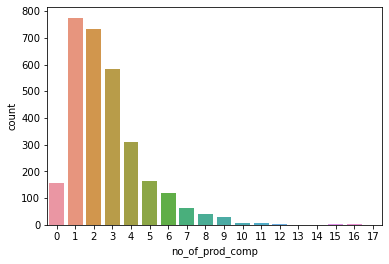

In [107]:
sns.countplot(train.no_of_prod_comp)

In [108]:
## top production companies

In [109]:
total_count_prod_comp=[]

for i in train.production_companies:
    d=get_dict(i)
    for j in d:
        total_count_prod_comp.append(j['name'])

In [110]:
Counter(total_count_prod_comp).most_common()

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23),
 ('Castle Rock Entertainment', 21),
 ('Epsilon Motion Pictures', 21),
 ('Morgan Creek Productions', 21),
 ('Original Film', 21),
 ('Focus 

In [111]:
top_production_comp=[]

def top_prod_companies(df):
    
    total_count_prod_comp=[]

    for i in train.production_companies:
        d=get_dict(i)
        for j in d:
            total_count_prod_comp.append(j['name'])
            
    for i in Counter(total_count_prod_comp).most_common():
        if i[1]>10:    ## taking the production_companies which has frequency count > 10
            top_production_comp.append(i[0])
            
    

In [112]:
top_prod_companies(train)

In [113]:
def top_prod_companies_one_hot_encoding(df):
    
    df['all_prod_comp'] = df['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')
    
    for i in top_production_comp:
        df['prod_comp_' + i] = df['all_prod_comp'].apply(lambda x: 1 if i in x else 0)

In [114]:
top_prod_companies_one_hot_encoding(train)

In [115]:
top_prod_companies_one_hot_encoding(test)

In [116]:
train.drop(['production_companies','all_prod_comp'], axis=1, inplace=True)
test.drop(['production_companies','all_prod_comp'], axis=1, inplace=True)

In [117]:
train.shape

(3000, 112)

In [118]:
test.shape

(4398, 111)

## 13. production_countries

In [119]:
## number of production_countries & its effect on revenue

In [120]:
def number_of_production_country(df):
    
    no_prod_countries=[]

    for i in df.production_countries:
        d=get_dict(i)

        no_prod_countries.append(len(d))
        
    df['no_prod_countries']=no_prod_countries

In [121]:
number_of_production_country(train)

In [122]:
number_of_production_country(test)

<AxesSubplot:xlabel='no_prod_countries', ylabel='count'>

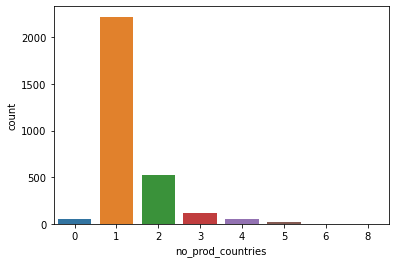

In [123]:
sns.countplot(train.no_prod_countries)

In [124]:
## top production country

In [125]:
total_count_prod_country=[]

for i in train.production_countries:
    d=get_dict(i)
    for j in d:
        total_count_prod_country.append(j['iso_3166_1'])

In [126]:
Counter(total_count_prod_country).most_common(20)

[('US', 2282),
 ('GB', 380),
 ('FR', 222),
 ('DE', 167),
 ('CA', 120),
 ('IN', 81),
 ('IT', 64),
 ('JP', 61),
 ('AU', 61),
 ('RU', 58),
 ('ES', 54),
 ('CN', 42),
 ('HK', 42),
 ('IE', 23),
 ('BE', 23),
 ('KR', 22),
 ('MX', 19),
 ('SE', 18),
 ('NZ', 17),
 ('NL', 15)]

In [127]:
top_production_country=[]

def top_prod_country(df):
    
    total_count_prod_country=[]

    for i in df.production_countries:
        d=get_dict(i)
        for j in d:
            total_count_prod_country.append(j['iso_3166_1'])
            
    for i in Counter(total_count_prod_country).most_common():
        if i[1]>10:             ## taking the production_countries which has frequency count > 10
            top_production_country.append(i[0])

In [128]:
top_prod_country(train)

In [129]:
def top_prod_country_one_hot_encoding(df):
    df['all_prod_country'] = df['production_countries'].apply(lambda x: ' '.join(sorted([i['iso_3166_1'] 
                                    for i in get_dict(x) ])) if x!= {} else '')
    
    for i in top_production_country:
        df['prod_country_' + i] = df['all_prod_country'].apply(lambda x: 1 if i in x else 0)

In [130]:
top_prod_country_one_hot_encoding(train)

In [131]:
top_prod_country_one_hot_encoding(test)

In [132]:
train.drop(['production_countries','all_prod_country'], axis=1, inplace=True)
test.drop(['production_countries','all_prod_country'], axis=1, inplace=True)

In [133]:
train.shape

(3000, 135)

In [134]:
test.shape

(4398, 134)

## 14. release_date

In [135]:
## function for converting the date from yy to  yyyy format 

def date(x):
    x=str(x)
    year=x.split('/')[2]
    if int(year)<19:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year

In [136]:
## filling the missing value

train['release_date'] =train['release_date'].fillna('1/1/90').apply(lambda x: date(x))
test['release_date']  =test['release_date'].fillna('1/1/90').apply(lambda x: date(x))

In [137]:
## converted release date in yyyy format

train['release_date'] = train['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))
test['release_date']  = test['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))

In [138]:

train['release_weekday']   = train['release_date'].apply(lambda x:x.weekday())
train['release_month'] = train['release_date'].apply(lambda x:x.month)
train['release_year']  = train['release_date'].apply(lambda x:x.year)

test['release_weekday']   = test['release_date'].apply(lambda x:x.weekday())
test['release_month'] = test['release_date'].apply(lambda x:x.month)
test['release_year']  = test['release_date'].apply(lambda x:x.year)

In [139]:
## weekday

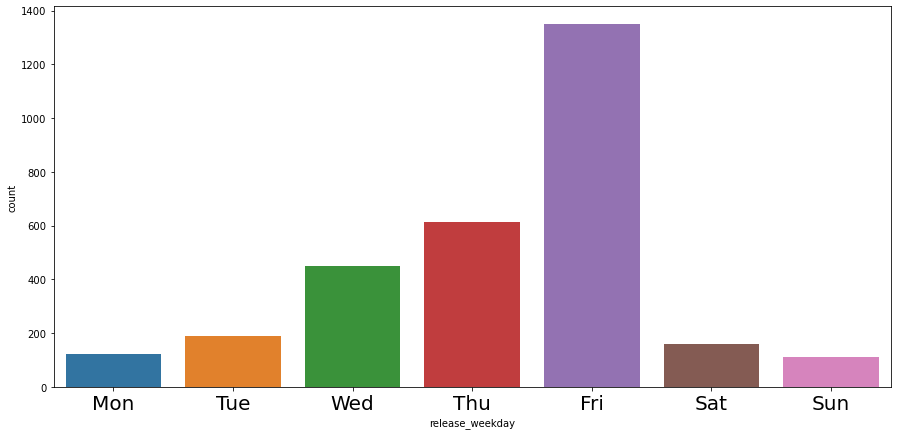

In [140]:
plt.figure(figsize = (15,7))
sns.countplot(train.release_weekday)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

In [141]:
## from above figure we can see that the on the friday more number of movie is released

In [142]:
## release month

<AxesSubplot:xlabel='release_month', ylabel='count'>

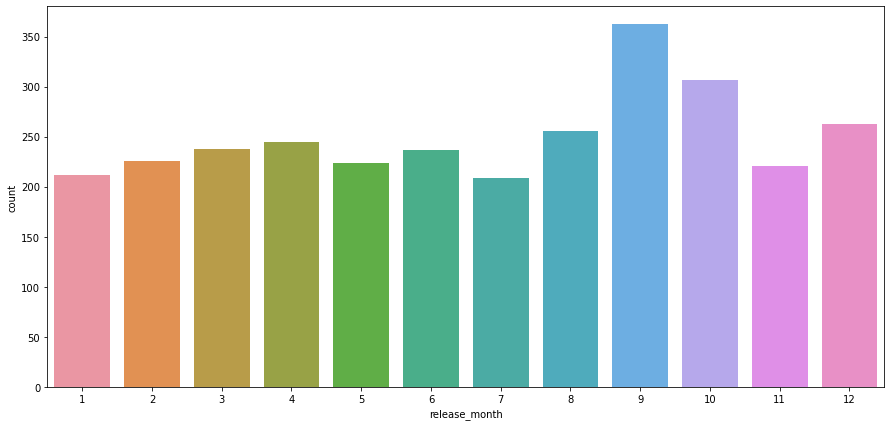

In [143]:
plt.figure(figsize = (15,7))
sns.countplot(train.release_month)

In [144]:
## release year

<AxesSubplot:xlabel='release_year', ylabel='count'>

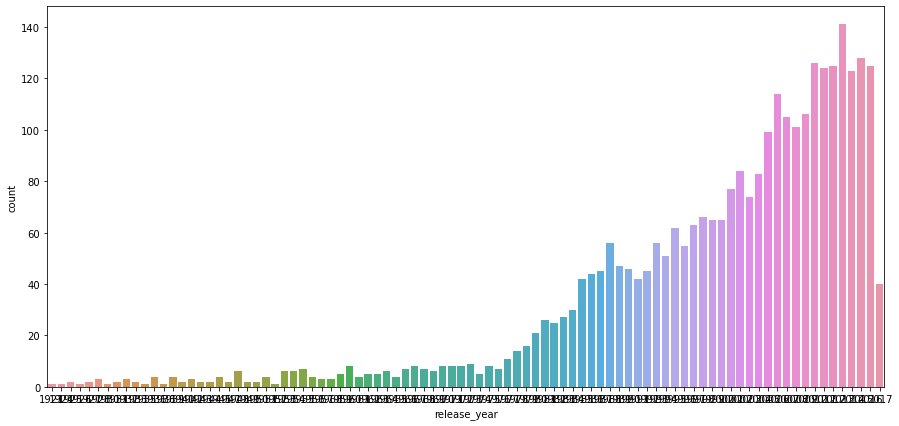

In [145]:
plt.figure(figsize = (15,7))
sns.countplot(train.release_year)

<AxesSubplot:xlabel='release_year', ylabel='revenue'>

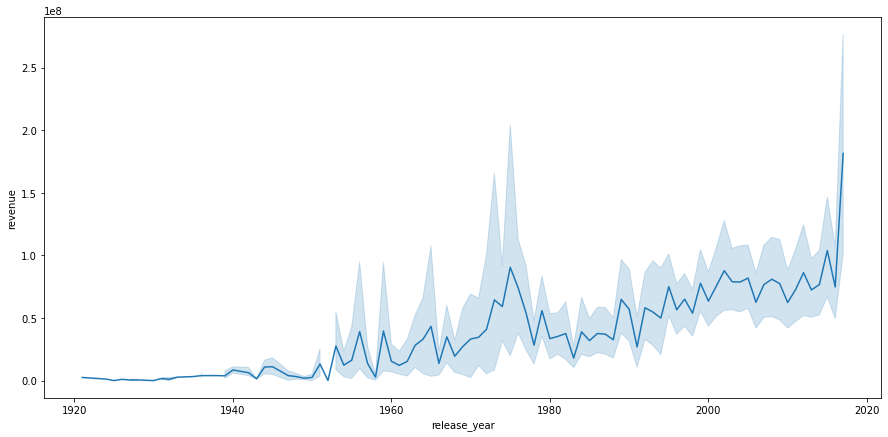

In [146]:
plt.figure(figsize = (15,7))
sns.lineplot(x=train.release_year, y=train.revenue)

In [147]:
## from the above figure we can see that the revenue is inceasing as the year increases

In [148]:
train.drop('release_date', axis=1, inplace=True)
test.drop('release_date', axis=1, inplace=True)

In [149]:
train.shape

(3000, 137)

In [150]:
test.shape

(4398, 136)

## 15. runtime

In [151]:
## check the distribution of data

<AxesSubplot:xlabel='runtime', ylabel='Count'>

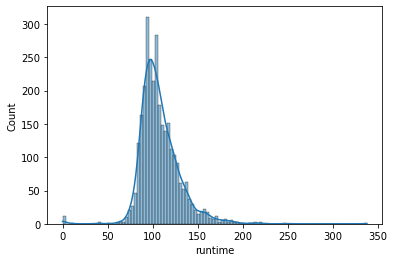

In [152]:
sns.histplot(train.runtime, kde=True)

<AxesSubplot:xlabel='runtime', ylabel='Count'>

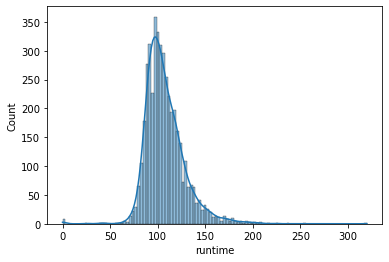

In [153]:
sns.histplot(test.runtime, kde=True)

In [154]:
train.runtime.isnull().sum()

2

In [155]:
test.runtime.isnull().sum()

4

In [156]:
## as we can see thet the data is normally distributed we can fill the misssing value with mean()

In [157]:
train.runtime=train.runtime.fillna(train.runtime.mean())

In [158]:
test.runtime=test.runtime.fillna(test.runtime.mean())

## 16. spoken_languages

In [159]:
## number of spoken_languages and its effect on revenue

In [160]:
def number_of_spoken_lang(df):
    
    no_lang_spoken=[]

    for i in df.spoken_languages:
        d=get_dict(i)

        no_lang_spoken.append(len(d))
        
    df['no_lang_spoken']=no_lang_spoken

In [161]:
number_of_spoken_lang(train)

In [162]:
number_of_spoken_lang(test)

<AxesSubplot:xlabel='no_lang_spoken', ylabel='count'>

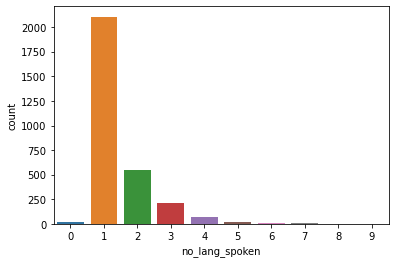

In [163]:
sns.countplot(train.no_lang_spoken)

In [164]:
## top spoken language

In [165]:
total_count_spoken_lang=[]

for i in train.spoken_languages:
    d=get_dict(i)
    for j in d:
        total_count_spoken_lang.append(j['iso_639_1'])

In [166]:
Counter(total_count_spoken_lang).most_common(20)

[('en', 2618),
 ('fr', 288),
 ('es', 239),
 ('de', 169),
 ('ru', 152),
 ('it', 124),
 ('ja', 89),
 ('zh', 68),
 ('hi', 56),
 ('pt', 43),
 ('ar', 40),
 ('ko', 37),
 ('cn', 36),
 ('ta', 27),
 ('pl', 25),
 ('hu', 24),
 ('la', 23),
 ('sv', 22),
 ('th', 22),
 ('cs', 20)]

In [167]:
top_spoken_lang=[]

def top_spoken_language(df):
    
    total_count_spoken_lang=[]

    for i in df.spoken_languages:
        d=get_dict(i)
        for j in d:
            total_count_spoken_lang.append(j['iso_639_1'])
            
    for i in Counter(total_count_spoken_lang).most_common():
        if i[1]>10:          ## taking the spoken_languages which has frequency count > 10
            top_spoken_lang.append(i[0])
    

In [168]:
top_spoken_language(train)

In [169]:
def top_spoken_language_one_hot_encoding(df):
    
    df['spoken_lang'] = df['spoken_languages'].apply(lambda x: ' '.join(sorted([i['iso_639_1'] for i in get_dict(x) ])) 
                                           if x!= {} else '')
    
    for i in top_spoken_lang:
        df['spoken_lang_' + i] = df['spoken_lang'].apply(lambda x: 1 if i in x else 0)

In [170]:
top_spoken_language_one_hot_encoding(train)

In [171]:
top_spoken_language_one_hot_encoding(test)

In [172]:
train.drop(['spoken_languages','spoken_lang'], axis=1, inplace=True)
test.drop(['spoken_languages','spoken_lang'], axis=1, inplace=True)

In [173]:
train.shape

(3000, 161)

In [174]:
test.shape

(4398, 160)

## 17. status

In [175]:
train.status.unique()

array(['Released', 'Rumored'], dtype=object)

In [176]:
## effect of status on revenue

In [177]:
train['is_released']=1
test['is_released']=1

In [178]:
## placing the 0 where status isn not Released

train.loc[ train['status']!= 'Released','is_released' ]=0
test.loc[ test['status']!= 'Released','is_released' ]=0

<AxesSubplot:xlabel='is_released', ylabel='revenue'>

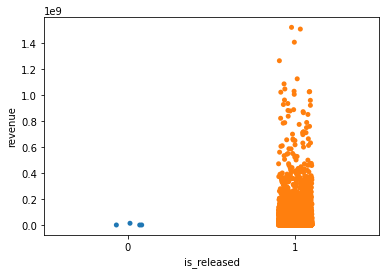

In [179]:
sns.stripplot(x=train.is_released,y=train.revenue)

In [180]:
## from the above fig. we can see that the movie which is not released has low revenue

In [181]:
train.drop('status', axis=1, inplace=True)
test.drop('status', axis=1, inplace=True)

## 18. tagline

In [182]:
## checking the effect of tagline on the revenue

In [183]:
train.tagline

0       The Laws of Space and Time are About to be Vio...
1       It can take a lifetime to find true love; she'...
2         The road to greatness can take you to the edge.
3                                                     NaN
4                                                     NaN
                              ...                        
2995    It was supposed to be a routine prisoner trans...
2996                                                  NaN
2997                 What's forgotten is not always gone.
2998    For the most cautious man on Earth, life is ab...
2999            They stole his life. He's taking it back.
Name: tagline, Length: 3000, dtype: object

In [184]:
train.tagline.isnull().sum()

597

In [185]:
def has_tagline(df):
    
    has_tagline=[]
    
    for i in df.tagline:
        if str(i)=='nan':
            has_tagline.append(0)
        else:
            has_tagline.append(1)
    
    df['has_tagline']=has_tagline

In [186]:
has_tagline(train)

In [187]:
has_tagline(test)

<AxesSubplot:xlabel='has_tagline', ylabel='revenue'>

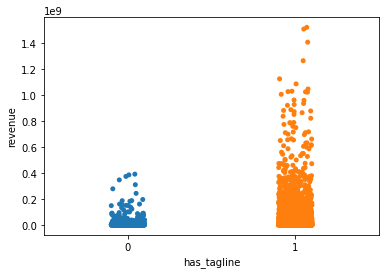

In [188]:
sns.stripplot(x=train.has_tagline,y=train.revenue)

In [189]:
## from the above fig. we can see that the movie which has tagline has more revenue that those whcih has no tagline 

In [190]:
train.drop('tagline', axis=1, inplace=True)
test.drop('tagline', axis=1, inplace=True)

## 19. title

In [191]:
train.title

0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                        Kahaani
4                                     Marine Boy
                          ...                   
2995                                     Chasers
2996                            We Are the Best!
2997                     The Long Kiss Goodnight
2998                            Along Came Polly
2999                                   Abduction
Name: title, Length: 3000, dtype: object

In [192]:
train.title.isnull().sum()

0

In [193]:
## effect of word count on revenue

In [194]:
train['title_word_count'] = train.title.str.split().str.len()
test['title_word_count'] = test.title.str.split().str.len()

<AxesSubplot:xlabel='title_word_count', ylabel='revenue'>

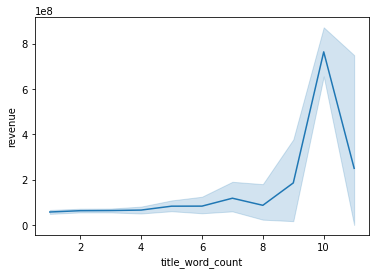

In [195]:
sns.lineplot(x=train.title_word_count,y=train.revenue)

In [196]:
## from the above fig. we can see that the movie which has more word count has more revenue

In [197]:
train.drop('title', axis=1, inplace=True)
test.drop('title', axis=1, inplace=True)

## 20. Keywords

In [198]:
train.Keywords

0       [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1       [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2       [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3       [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                     NaN
                              ...                        
2995    [{'id': 378, 'name': 'prison'}, {'id': 572, 'n...
2996    [{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...
2997    [{'id': 441, 'name': 'assassination'}, {'id': ...
2998    [{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...
2999    [{'id': 591, 'name': 'cia'}, {'id': 822, 'name...
Name: Keywords, Length: 3000, dtype: object

In [199]:
train.Keywords.isnull().sum()

276

In [200]:
test.Keywords.isnull().sum()

393

In [201]:
## effect on the revenue which has keyword & which hasn't

In [202]:
def has_keyword(df):
    
    has_keyword=[]
    
    for i in df.Keywords:
        if str(i)=='nan':
            has_keyword.append(0)
        else:
            has_keyword.append(1)
        
    df['has_keyword']=has_keyword

In [203]:
has_keyword(train)

In [204]:
has_keyword(test)

<AxesSubplot:xlabel='has_keyword', ylabel='revenue'>

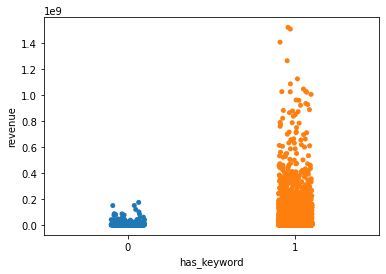

In [205]:
sns.stripplot(x=train.has_keyword,y=train.revenue)

In [206]:
## movie which has keyword has more revenue

In [207]:
## top keywords

In [208]:
total_count_keyword=[]

for i in train.Keywords:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_keyword.append(j['name'])

In [209]:
Counter(total_count_keyword).most_common(20)

[('woman director', 175),
 ('independent film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based on novel', 111),
 ('violence', 87),
 ('sport', 82),
 ('biography', 77),
 ('aftercreditsstinger', 75),
 ('dystopia', 73),
 ('revenge', 73),
 ('friendship', 72),
 ('sex', 71),
 ('suspense', 67),
 ('sequel', 66),
 ('love', 64),
 ('police', 64),
 ('teenager', 61),
 ('nudity', 57),
 ('female nudity', 53)]

In [210]:
top_keyword=[]

def top_keywords(df):
    
    total_count_keyword=[]

    for i in df.Keywords:
        d=get_dict(i)
        for j in d:
            total_count_keyword.append(j['name'])
            
    
    for i in Counter(total_count_keyword).most_common():
        if i[1]>10:     ## taking the Keywords which has frequency count > 10
            top_keyword.append(i[0])


In [211]:
top_keywords(train)

In [212]:
def top_keywords_one_hot_encoding(df):
    
    df['all_keyword'] = df['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')
    
    for i in top_keyword:
        df['keyword_' + i] = df['all_keyword'].apply(lambda x: 1 if i in x else 0)
    

In [213]:
top_keywords_one_hot_encoding(train)

In [214]:
top_keywords_one_hot_encoding(test)

In [215]:
train.drop(['Keywords','all_keyword'], axis=1, inplace=True)
test.drop(['Keywords','all_keyword'], axis=1, inplace=True)

In [216]:
train.shape

(3000, 469)

In [217]:
test.shape

(4398, 468)

## 21. cast

In [218]:
train.cast

0       [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1       [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2       [{'cast_id': 5, 'character': 'Andrew Neimann',...
3       [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4       [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
                              ...                        
2995    [{'cast_id': 2, 'character': 'Rock Reilly', 'c...
2996    [{'cast_id': 5, 'character': 'Bobo', 'credit_i...
2997    [{'cast_id': 10, 'character': 'Samantha Caine ...
2998    [{'cast_id': 8, 'character': 'Reuben Feffer', ...
2999    [{'cast_id': 2, 'character': 'Nathan Harper', ...
Name: cast, Length: 3000, dtype: object

In [219]:
## number of cast 

In [220]:
def number_of_cast(df):
    
    no_cast=[]

    for i in df.cast:
        d=get_dict(i)
        no_cast.append(len(d))
    
    df['no_cast']=no_cast

In [221]:
number_of_cast(train)

In [222]:
number_of_cast(test)

In [223]:
# sns.scatterplot(x=train.no_cast,y=train.revenue)

In [224]:
## top cast

In [225]:
total_count_cast=[]

for i in train.cast:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_cast.append(j['name'])

In [226]:
Counter(total_count_cast).most_common(20)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21),
 ('Jason Statham', 21),
 ('Keith David', 21),
 ('John Goodman', 21),
 ('Mel Gibson', 21),
 ('Sigourney Weaver', 21)]

In [227]:
top_cast=[]

def top_cast_(df):
    
    total_count_cast=[]

    for i in df.cast:
        d=get_dict(i)
        for j in d:
            total_count_cast.append(j['name'])
            
    for i in Counter(total_count_cast).most_common():
        if i[1]>10:            ## taking the cast which has frequency count > 10
            top_cast.append(i[0])
    

In [228]:
top_cast_(train)

In [229]:
def top_cast_one_hot_encoding(df):
    
    df['all_cast'] = df['cast'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')
    
    for i in top_cast:
        df['cast_' + i] = df['all_cast'].apply(lambda x: 1 if i in x else 0)

In [230]:
top_cast_one_hot_encoding(train)

In [231]:
top_cast_one_hot_encoding(test)

In [232]:
train.drop(['cast','all_cast'], axis=1, inplace=True)
test.drop(['cast','all_cast'], axis=1, inplace=True)

In [233]:
train.shape

(3000, 763)

In [234]:
test.shape

(4398, 762)

## 22. crew

In [235]:
train.crew

0       [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1       [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2       [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
3       [{'credit_id': '52fe48779251416c9108d6eb', 'de...
4       [{'credit_id': '52fe464b9251416c75073b43', 'de...
                              ...                        
2995    [{'credit_id': '52fe4494c3a368484e02ac7d', 'de...
2996    [{'credit_id': '5716b72ac3a3686678012c84', 'de...
2997    [{'credit_id': '52fe443a9251416c7502d579', 'de...
2998    [{'credit_id': '556f817b9251410866000a63', 'de...
2999    [{'credit_id': '5391990d0e0a260fb5001629', 'de...
Name: crew, Length: 3000, dtype: object

In [236]:
## number of crew

In [237]:
def number_of_crew(df):
    
    no_of_crew=[]

    for i in df.crew:
        d=get_dict(i)

        no_of_crew.append(len(d))
    
    df['no_of_crew']=no_of_crew

In [238]:
number_of_crew(train)

In [239]:
number_of_crew(test)

In [240]:
## top crew

In [241]:
total_count_crew=[]

for i in train.crew:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_crew.append(j['name'])

In [242]:
Counter(total_count_crew).most_common(20)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30),
 ('Jane Jenkins', 29),
 ('John Debney', 28),
 ('Hans Zimmer', 28),
 ('John Papsidera', 28),
 ('Francis Ford Coppola', 28)]

In [243]:
top_crew=[]

def top_crew_(df):
    
    total_count_crew=[]

    for i in df.crew:
        d=get_dict(i)
        for j in d:
            total_count_crew.append(j['name'])
            
    for i in Counter(total_count_crew).most_common():
        if i[1]>20:               ## taking the crew which has frequency count > 20
            top_crew.append(i[0])

In [244]:
top_crew_(train)

In [245]:
def top_crew_one_hot_encoding(df):
    
    df['all_crew'] = df['crew'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')
    
    for i in top_crew:
        df['crew_' + i] = df['all_crew'].apply(lambda x: 1 if i in x else 0)

In [246]:
top_crew_one_hot_encoding(train)

In [247]:
top_crew_one_hot_encoding(test)

In [248]:
train.drop(['crew','all_crew'], axis=1, inplace=True)
test.drop(['crew','all_crew'], axis=1, inplace=True)

In [249]:
train.shape

(3000, 826)

In [250]:
test.shape

(4398, 825)

## 23. popularity2

In [251]:
## checking the distribution of data

In [252]:
## train

<AxesSubplot:xlabel='popularity2', ylabel='Count'>

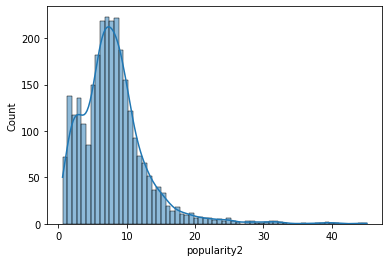

In [253]:
sns.histplot(train.popularity2, kde=True)

In [254]:
## from the above fig. we can see the data is +ve skew. so tranforming the +ve dist. to noramal dist. using log transformation

<AxesSubplot:xlabel='popularity2', ylabel='Count'>

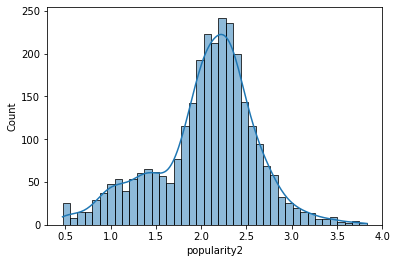

In [255]:
sns.histplot(np.log1p(train.popularity2), kde=True)

In [256]:
## test

<AxesSubplot:xlabel='popularity2', ylabel='Count'>

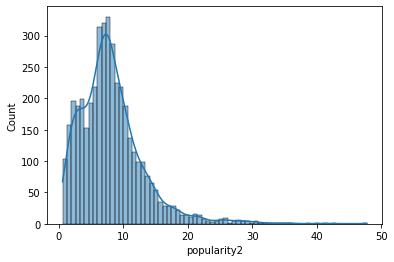

In [257]:
sns.histplot(test.popularity2, kde=True)

<AxesSubplot:xlabel='popularity2', ylabel='Count'>

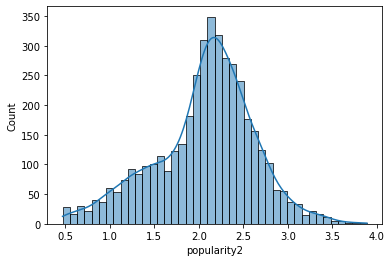

In [258]:
sns.histplot(np.log1p(test.popularity2), kde=True)

In [259]:
## since the initial distribution is +ve skew for both train and test so we can fill the null value with 
## the mode or median value

In [260]:
train.popularity2.isnull().sum()

118

In [261]:
test.popularity2.isnull().sum()

179

In [262]:
train.popularity2=train.popularity2.fillna(train.popularity2.median())
test.popularity2=test.popularity2.fillna(test.popularity2.median())

## 24. rating

<AxesSubplot:xlabel='rating', ylabel='Count'>

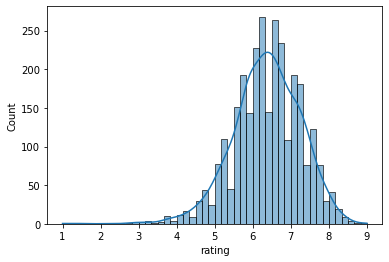

In [263]:
sns.histplot(train.rating, kde=True)

<AxesSubplot:xlabel='rating', ylabel='Count'>

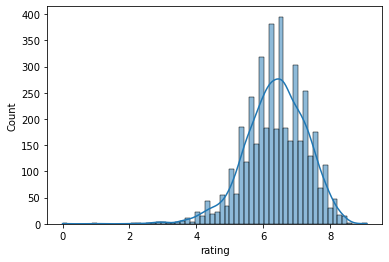

In [264]:
sns.histplot(test.rating, kde=True)

In [265]:
train.rating.isnull().sum()

118

In [266]:
test.rating.isnull().sum()

179

In [267]:
## in this case after looking the distribution we can fill the null value with the mean since its normal dist.

In [268]:
train.rating=train.rating.fillna(train.rating.mean())
test.rating=test.rating.fillna(test.rating.mean())

## 25. totalVotes

In [269]:
## checking the dist. of data

In [270]:
## train

<AxesSubplot:xlabel='totalVotes', ylabel='Count'>

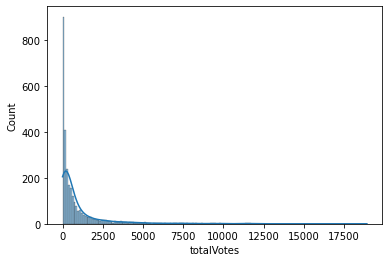

In [271]:
sns.histplot(train.totalVotes, kde=True)

In [272]:
## +ve skew data

In [273]:
## applying the log tranfromation

<AxesSubplot:xlabel='totalVotes', ylabel='Count'>

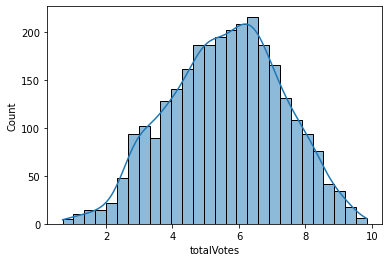

In [274]:
sns.histplot(np.log1p(train.totalVotes), kde=True)

In [275]:
## test

<AxesSubplot:xlabel='totalVotes', ylabel='Count'>

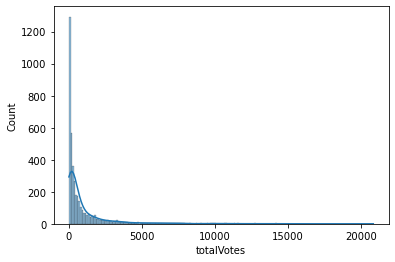

In [276]:
sns.histplot(test.totalVotes, kde=True)

In [277]:
## +ve skew data

In [278]:
## applying the log transformation

<AxesSubplot:xlabel='totalVotes', ylabel='Count'>

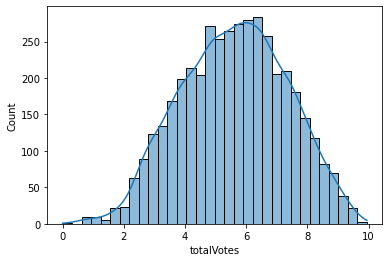

In [279]:
sns.histplot(np.log1p(test.totalVotes), kde=True)

In [280]:
## null value checking

In [281]:
train.totalVotes.isnull().sum()

118

In [282]:
test.totalVotes.isnull().sum()

179

In [283]:
## since the initial dist. for totalvotes is +ve skew so we can fill the null value with mode or median

In [284]:
train.totalVotes=train.totalVotes.fillna(train.totalVotes.median())
test.totalVotes=test.totalVotes.fillna(test.totalVotes.median())

## log1p transformation for the +ve skew data

In [285]:
## train

In [286]:
train['popularity'] = np.log1p(train['popularity'])   #log(1+x)  #expm1 - inverse
train['popularity2'] = np.log1p(train['popularity2'])
train['budget'] = np.log1p(train['budget'])
train['runtime'] = np.log1p(train['runtime'])
train['totalVotes'] = np.log1p(train['totalVotes'])
train['revenue'] = np.log1p(train['revenue'])

In [287]:
## train

In [288]:
test['popularity'] = np.log1p(test['popularity'])   #log(1+x)  #expm1 - inverse
test['popularity2'] = np.log1p(test['popularity2'])
test['budget'] = np.log1p(test['budget'])
test['runtime'] = np.log1p(test['runtime'])
test['totalVotes'] = np.log1p(test['totalVotes'])

## final shape

In [289]:
train.shape

(3000, 826)

In [290]:
test.shape

(4398, 825)

In [291]:
## checking the final null value in train and test dats sets 

In [292]:
train.isnull().sum().sum()

8

In [293]:
test.isnull().sum().sum()

17

In [294]:
## filling left null values with 0

In [295]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [296]:
train.head(1)

,budget,popularity,runtime,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,homepage_exit,orignal_lang_english,original_title_letter_count,original_title_word_count,overview_word_count,no_of_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Columbia Pictures Corporation,prod_comp_TriStar Pictures,prod_comp_Relativity Media,prod_comp_Canal+,prod_comp_United Artists,prod_comp_Miramax Films,prod_comp_Village Roadshow Pictures,prod_comp_Regency Enterprises,prod_comp_BBC Films,prod_comp_Dune Entertainment,prod_comp_Working Title Films,prod_comp_Fox Searchlight Pictures,prod_comp_StudioCanal,prod_comp_Lionsgate,prod_comp_DreamWorks SKG,prod_comp_Fox 2000 Pictures,prod_comp_Summit Entertainment,prod_comp_Hollywood Pictures,prod_comp_Orion Pictures,prod_comp_Amblin Entertainment,prod_comp_Dimension Films,prod_comp_Castle Rock Entertainment,prod_comp_Epsilon Motion Pictures,prod_comp_Morgan Creek Productions,prod_comp_Original Film,prod_comp_Focus Features,prod_comp_Legendary Pictures,prod_comp_Participant Media,prod_comp_Blumhouse Productions,prod_comp_New Regency Pictures,prod_comp_Film4,prod_comp_Spyglass Entertainment,prod_comp_Imagine Entertainment,prod_comp_Screen Gems,prod_comp_Millennium Films,prod_comp_TSG Entertainment,prod_comp_Lakeshore Entertainment,prod_comp_France 2 Cinéma,prod_comp_Silver Pictures,prod_comp_The Weinstein Company,prod_comp_PolyGram Filmed Entertainment,prod_comp_Eon Productions,prod_comp_Scott Rudin Productions,prod_comp_Dune Entertainment III,prod_comp_Happy Madison Productions,prod_comp_Studio Babelsberg,prod_comp_Lions Gate Films,prod_comp_EuropaCorp,prod_comp_Gaumont,prod_comp_Carolco Pictures,prod_comp_American Zoetrope,prod_comp_UK Film Council,prod_comp_TF1 Films Production,prod_comp_Ciné+,prod_comp_Revolution Studios,prod_comp_Davis Entertainment,prod_comp_Canal+ España,prod_comp_Ingenious Film Partners,prod_comp_Scott Free Productions,prod_comp_Wild Bunch,no_prod_countries,prod_country_US,prod_country_GB,prod_country_FR,prod_country_DE,prod_country_CA,prod_country_IN,prod_country_IT,prod_country_JP,prod_country_AU,prod_country_RU,prod_country_ES,prod_country_CN,prod_country_HK,prod_country_IE,prod_country_BE,prod_country_KR,prod_country_MX,prod_country_SE,prod_country_NZ,prod_country_NL,prod_country_CZ,prod_country_DK,prod_country_BR,release_weekday,release_month,release_year,no_lang_spoken,spoken_lang_en,spoken_lang_fr,spoken_lang_es,spoken_lang_de,spoken_lang_ru,spoken_lang_it,spoken_lang_ja,spoken_lang_zh,spoken_lang_hi,spoken_lang_pt,spoken_lang_ar,spoken_lang_ko,spoken_lang_cn,spoken_lang_ta,spoken_lang_pl,spoken_lang_hu,spoken_lang_la,spoken_lang_sv,spoken_lang_th,spoken_lang_cs,spoken_lang_he,spoken_lang_el,spoken_lang_tr,spoken_lang_da,is_released,has_tagline,title_word_count,has_keyword,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation,keyword_wedding,keyword_3d,keyword_detective,keyword_london england,keyword_paris,keyword_based on comic,keyword_robbery,keyword

## Model Building

In [297]:
X=train.drop('revenue', axis=1)

In [298]:
y=train.revenue

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [300]:
## function to get the Root Mean Squared Logarithmic Error (RMSLE)

def get_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error( np.expm1(y_true), y_pred ))

## Linear Regression

In [301]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)

predict=lr.predict(X_test)
predict=np.expm1(predict)

get_score(y_test,predict)

2.4654007684800736

In [302]:
lr.fit(X,y)

predict=lr.predict(test)
predict=np.expm1(predict)


In [303]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('linear_reg.csv', index=False)
df

,id,revenue
0,3001,1.059767e+07
1,3002,2.059704e+06
2,3003,5.429172e+06
3,3004,5.254264e+06
4,3005,3.311882e+06
...,...,...
4393,7394,1.427335e+06
4394,7395,1.792471e+07
4395,7396,7.937961e+07
4396,7397,6.000536e+06


In [304]:
dd

NameError: name 'dd' is not defined

## Decision Tree

In [ ]:
## without hyperparameter tuning

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dc=DecisionTreeRegressor(random_state=42)

dc.fit(X_train,y_train)

predict=dc.predict(X_test)

predict=np.expm1(predict)

get_score(y_test,predict)

In [ ]:
dc.fit(X,y)

predict=dc.predict(test)
predict=np.expm1(predict)

In [ ]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('decision_tree.csv', index=False)
df

In [ ]:
## applying hyperparameter tuning 

In [ ]:
dc= DecisionTreeRegressor()

param_dist = {'max_depth':[2,5,6,8,9],
    'min_samples_split':[2,5,7,8,9],
    'min_samples_leaf':[2,5,7,8,9],
    'random_state':[42]
}

dc_rdcv = RandomizedSearchCV(dc,param_dist, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

dc_rdcv.fit(X_train, y_train)

dc_rdcv.best_params_

In [ ]:
predict=dc_rdcv.predict(X_test)

predict=np.expm1(predict)

get_score(y_test,predict)

In [ ]:
dc_rdcv.fit(X,y)

predict=dc_rdcv.predict(test)
predict=np.expm1(predict)

In [ ]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('decision_tree_tuning.csv', index=False)
df

## Random forest 

In [ ]:
## without hyperparameter tuning 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rdf=RandomForestRegressor(random_state=42)

rdf.fit(X_train,y_train)

predict=rdf.predict(X_test)
predict=np.expm1(predict)

get_score(y_test,predict)

In [ ]:
rdf.fit(X,y)

predict=rdf.predict(test)
predict=np.expm1(predict)

In [ ]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('rdf.csv', index=False)
df

In [ ]:
## applying hyperparameter tuning 

In [ ]:
rdf= RandomForestRegressor()

param_dist = {'n_estimators':[100,105,200,250,300,400,500,800,1000],
    'max_depth':[2,5,7,8,9],
    'min_samples_split':[2,5,7,8,9],
    'min_samples_leaf':[2,5,7,8,9],
    'random_state':[42],
    'max_samples':[0.7,0.8,1.0],
}

rdf_rdcv = RandomizedSearchCV(rdf,param_dist, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

rdf_rdcv.fit(X_train, y_train)

rdf_rdcv.best_params_

In [ ]:
predict=rdf_rdcv.predict(X_test)

predict=np.expm1(predict)

get_score(y_test,predict)

In [ ]:
rdf_rdcv.fit(X,y)

predict=rdf_rdcv.predict(test)
predict=np.expm1(predict)

In [ ]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('rdf_tuning.csv', index=False)
df

## XGboost

In [ ]:
## without hyperparameter tuning 

In [ ]:
from xgboost import XGBRegressor

xgb=XGBRegressor(random_state=42)

xgb.fit(X_train,y_train)

predict=xgb.predict(X_test)
predict=np.expm1(predict)

get_score(y_test,predict)

In [ ]:
xgb.fit(X,y)

predict=xgb.predict(test)
predict=np.expm1(predict)

In [ ]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('xgb.csv', index=False)
df

In [ ]:
## applying hyperparameter tuning 

In [ ]:
xgb = XGBRegressor()

param_dist = {
    'eta': [0.01,0.1,0.2],
    'gamma': [0,1,1.45], 
    'max_depth': [5,6,7],
    'min_child_weight': [1,3],
    'subsample': [0.6,0.7,0.8],
    'colsample_bytree': [0.6,0.7,0.8], 
    'colsample_bylevel': [0.5,0.6,0.8], 
    'seed': [22]
}

xgb_rdcv = RandomizedSearchCV(xgb,param_dist, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)

xgb_rdcv.fit(X_train, y_train)

xgb_rdcv.best_params_

In [ ]:
predict=xgb_rdcv.predict(X_test)

predict=np.expm1(predict)

get_score(y_test,predict)

In [ ]:
xgb_rdcv.fit(X,y)

predict=xgb_rdcv.predict(test)
predict=np.expm1(predict)

In [ ]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('xgb_tuning.csv', index=False)
df

In [ ]:
'subsample': 0.7,
 'seed': 42,
 'objective': 'reg:linear',
 'max_depth': 5,
 'gamma': 1,
 'eta': 0.1,
 'colsample_bytree': 1.0,
 'colsample_bylevel': 0.5}

In [ ]:
xgb=XGBRegressor(eta=0.1,
                max_depth=5, 
                n_estimators=10000,
                gamma=1, 
                subsample=0.7, 
                colsample_bytree=1.0, 
                colsample_bylevel=0.5,
                random_state =42)

xgb.fit(X_train,y_train)

predict=xgb.predict(X_test)
predict=np.expm1(predict)

get_score(y_test,predict)

In [ ]:
xgb.fit(X,y)

predict=xgb.predict(test)
predict=np.expm1(predict)

In [ ]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('xgb_tuning.csv', index=False)
df

## Light GBM 

In [ ]:
## without hyperparameter tuning

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm=LGBMRegressor(random_state=42)

lgbm.fit(X_train,y_train)

predict=lgbm.predict(X_test)
predict=np.expm1(predict)

get_score(y_test,predict)

In [ ]:
lgbm.fit(X,y)

predict=lgbm.predict(test)
predict=np.expm1(predict)

In [ ]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('lgbm.csv', index=False)
df

In [ ]:
## applying hyperparameter tuning

In [ ]:
lgbm = LGBMRegressor()

param_dist = {
    'num_leaves':[25,30,32,35],
    'learning_rate': [0.01,0.1,0.2,0.3],
    'n_estimators': [100,200,300,400,500],
    'max_depth': [5,6,7,8,9,10],
    'subsample': [0.6,0.7,0.8,1.0],
    'colsample_bytree': [0.6,0.7,0.8,1.0], 
    'random_state': [42]
}

lgbm_rdcv = RandomizedSearchCV(lgbm,param_dist, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)

lgbm_rdcv.fit(X_train, y_train)

lgbm_rdcv.best_params_

In [ ]:
predict=lgbm_rdcv.predict(X_test)

predict=np.expm1(predict)

get_score(y_test,predict)

In [ ]:
lgbm_rdcv.fit(X,y)

predict=lgbm_rdcv.predict(test)
predict=np.expm1(predict)

In [ ]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('lgbm_tuning.csv', index=False)
df